In [1]:
# Value Function Iteration
## By contractionn mapping theorem, we are looking for a fixed point to the 
## functional equation V(a) = max_{c, a'} u(c) + beta * V(a')
## We can therefore solve this equation by iteration. 
## Plug in an initial guess for V(a), and then iterate until convergence.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Define parameters 
beta = 0.95
R = 1.05

# Define utility function 
def u(c):
    if c > 0: 
        return np.log(c)
    else:
        return -1e10

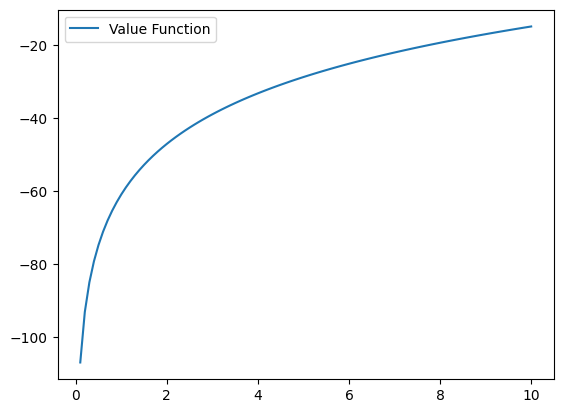

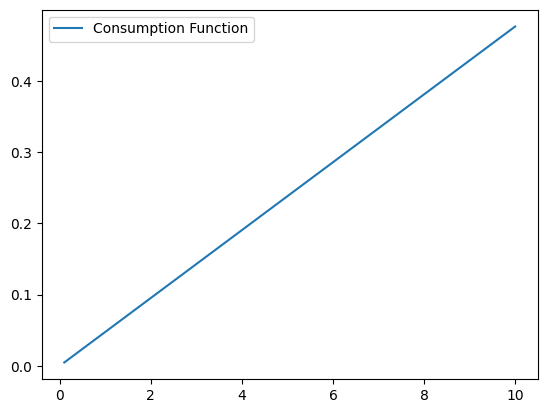

In [18]:
## Initialize the assets grid a.

a = np.linspace(0.1, 10, 100)

## Initialize the value function V, guessing V = 0 for all a. 

V = np.zeros(100)

## For every a_i in a, we need to find the optimal a'_i.

### For every a_j in a, compute T_{ij} = u(a_i - a_j / R) + beta * V(a_j)

T = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        T[i, j] = u(a[i] - a[j] / R) + beta * V[j]

### Find the maximum over the columns of T, and store the result in V_new.

V_new = np.max(T, axis = 1)

### Compute the distance between V and V_new, and store the result in dist.

dist = np.max(np.abs(V_new - V))

### Update V to V_new.

V = V_new

### Repeat until dist < 1e-6.

while dist > 1e-6:
    for i in range(100):
        for j in range(100):
            T[i, j] = u(a[i] - a[j] / R) + beta * V[j]
    V_new = np.max(T, axis = 1)
    dist = np.max(np.abs(V_new - V))
    V = V_new

## Plot the value function V(a).

plt.plot(a, V)

### Add a legend 

plt.legend(['Value Function'])

### Show the plot 

plt.show()

## Plot the optimal consumption function c(a).

c = a - a[np.argmax(T, axis = 1)] / R

plt.plot(a, c)

### Add a legend

plt.legend(['Consumption Function'])

plt.show()

